In [1]:
import pandas as pd

In [2]:
df_Fake = pd.read_csv('Fake.csv')
df_True = pd.read_csv('True.csv')

In [3]:
df_Fake['Fake'] = 1
df_True['Fake'] = 0

In [4]:
Fake_News_Data = pd.concat([df_Fake, df_True])

In [5]:
Fake_News_Data = Fake_News_Data.loc[: , ['Fake', 'title', 'text', 'date'] ]

In [6]:
Fake_News_Data.index = range(0 , len(Fake_News_Data))

Fake = 1 --> yes 

Fake = 0 --> no

In [7]:
Fake_News_Data.dtypes

Fake      int64
title    object
text     object
date     object
dtype: object

In [8]:
Fake_News_Data['Fake'] = Fake_News_Data['Fake'].astype('object')

In [9]:
Fake_News_Data

,Fake,title,text,date
0,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017"
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017"
2,1,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017"
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017"
4,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017"
...,...,...,...,...
44893,0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017"
44894,0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017"
44895,0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017"
44896,0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017"


In [10]:
Fake_News_Data['date'][30000]

'January 4, 2017 '

In [11]:
Fake_News_Data.describe(include='all')

,Fake,title,text,date
count,44898,44898,44898,44898
unique,2,38729,38646,2397
top,1,Factbox: Trump fills top jobs for his administ...,,"December 20, 2017"
freq,23481,14,627,182


In [12]:
Fake_News_Data.isnull().sum()

Fake     0
title    0
text     0
date     0
dtype: int64

In [13]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(8,8)})

In [14]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['Fake']== 1 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['Fake']== 0 , :] ) / len(Fake_News_Data)

In [15]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if Fake_News_Data['Fake'][i] == 1 :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19476\2699169446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes


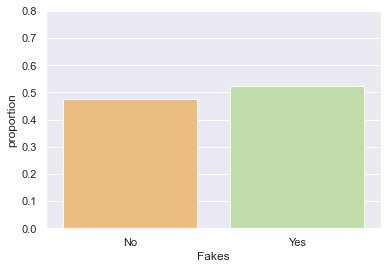

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

p1 = sns.barplot(x='Fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['No', 'Yes'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')

fig.savefig('p.png', format='png', dpi=1200)

In [17]:
[prop_Fake_no , prop_Fake_yes]

[0.47701456635039424, 0.5229854336496058]

In [18]:
[prop_Fake_no*len(Fake_News_Data) , prop_Fake_yes*len(Fake_News_Data)]

[21417.0, 23481.0]

In [19]:
Fake_News_Data = Fake_News_Data.loc[ : , Fake_News_Data.columns != 'proportion_Fakes']

In [20]:
Fake_News_Data['word_count'] = Fake_News_Data['text'].str.split().str.len()

In [21]:
Fake_News_Data['text'].str.split()

0        [Donald, Trump, just, couldn, t, wish, all, Am...
1        [House, Intelligence, Committee, Chairman, Dev...
2        [On, Friday,, it, was, revealed, that, former,...
3        [On, Christmas, day,, Donald, Trump, announced...
4        [Pope, Francis, used, his, annual, Christmas, ...
                               ...                        
44893    [BRUSSELS, (Reuters), -, NATO, allies, on, Tue...
44894    [LONDON, (Reuters), -, LexisNexis,, a, provide...
44895    [MINSK, (Reuters), -, In, the, shadow, of, dis...
44896    [MOSCOW, (Reuters), -, Vatican, Secretary, of,...
44897    [JAKARTA, (Reuters), -, Indonesia, will, buy, ...
Name: text, Length: 44898, dtype: object

In [22]:
Fake_News_Data

,Fake,title,text,date,word_count
0,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",495
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",305
2,1,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",580
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",444
4,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",420
...,...,...,...,...,...
44893,0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",466
44894,0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",125
44895,0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",320
44896,0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",205


In [23]:
Fake_News_Data.groupby('Fake')['word_count'].mean()

Fake
0    385.640099
1    423.197905
Name: word_count, dtype: float64

In [24]:
def limpiar_tokenizar(texto):

    import re
    
    '''
    Esta función limpia y tokeniza el texto en palabras individuales.
    El orden en el que se va limpiando el texto no es arbitrario.
    El listado de signos de puntuación se ha obtenido de: print(string.punctuation)
    y re.escape(string.punctuation)
    '''
    
    # Se convierte todo el texto a minúsculas

    nuevo_texto = texto.lower()
    
    # Eliminación de páginas web (palabras que empiezan por "http")
    
    nuevo_texto = re.sub('http\S+', ' ', nuevo_texto)
    
    # Eliminación de signos de puntuación
    
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    
    # Eliminación de números
    
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    
    # Eliminación de espacios en blanco múltiples
    
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    
    # Tokenización por palabras individuales
    
    nuevo_texto = nuevo_texto.split(sep = ' ')
    
    # Eliminación de tokens con una longitud <= 1
    
    nuevo_texto = [token for token in nuevo_texto if len(token) >=  2]
    
    return(nuevo_texto)

In [25]:

test = "Esto es 1 ejemplo de l'limpieza de6 TEXTO  https://t.co/rnHPgyhx4Z @cienciadedatos #textmining"

print(limpiar_tokenizar(texto=test))

['esto', 'es', 'ejemplo', 'de', 'limpieza', 'de', 'texto', 'cienciadedatos', 'textmining']


In [26]:
Fake_News_Data['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [27]:
print(limpiar_tokenizar(texto=Fake_News_Data['text'][0]))

['donald', 'trump', 'just', 'couldn', 'wish', 'all', 'americans', 'happy', 'new', 'year', 'and', 'leave', 'it', 'at', 'that', 'instead', 'he', 'had', 'to', 'give', 'shout', 'out', 'to', 'his', 'enemies', 'haters', 'and', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'the', 'former', 'reality', 'show', 'star', 'had', 'just', 'one', 'job', 'to', 'do', 'and', 'he', 'couldn', 'do', 'it', 'as', 'our', 'country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', 'want', 'to', 'wish', 'all', 'of', 'my', 'friends', 'supporters', 'enemies', 'haters', 'and', 'even', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'happy', 'and', 'healthy', 'new', 'year', 'president', 'angry', 'pants', 'tweeted', 'will', 'be', 'great', 'year', 'for', 'america', 'as', 'our', 'country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', 'want', 'to', 'wish', 'all', 'of', 'my', 'friends', 'supporters', 'enemies', 'haters', 'and', 'even', 'the', 'very', 'dishonest', 'fake', 'news', 'media', 'happy', 'and',

In [28]:
Fake_News_Data['text_tokenizado'] = Fake_News_Data['text'].apply( limpiar_tokenizar )

In [29]:
Fake_News_Data['id_text'] = range(0, len(Fake_News_Data))

In [30]:
Fake_News_Data

,Fake,title,text,date,word_count,text_tokenizado,id_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",495,"[donald, trump, just, couldn, wish, all, ameri...",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",305,"[house, intelligence, committee, chairman, dev...",1
2,1,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",580,"[on, friday, it, was, revealed, that, former, ...",2
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",444,"[on, christmas, day, donald, trump, announced,...",3
4,1,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",420,"[pope, francis, used, his, annual, christmas, ...",4
...,...,...,...,...,...,...,...
44893,0,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,"August 22, 2017",466,"[brussels, reuters, nato, allies, on, tuesday,...",44893
44894,0,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...","August 22, 2017",125,"[london, reuters, lexisnexis, provider, of, le...",44894
44895,0,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,"August 22, 2017",320,"[minsk, reuters, in, the, shadow, of, disused,...",44895
44896,0,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,"August 22, 2017",205,"[moscow, reuters, vatican, secretary, of, stat...",44896


In [31]:
Fake_News_Tokens = Fake_News_Data.loc[:, ['id_text', 'text_tokenizado', 'Fake'] ].explode(column='text_tokenizado')

Fake_News_Tokens = Fake_News_Tokens.rename(columns={'text_tokenizado':'token'})

In [32]:
Fake_News_Tokens

,id_text,token,Fake
0,0,donald,1
0,0,trump,1
0,0,just,1
0,0,couldn,1
0,0,wish,1
...,...,...,...
44897,44897,technology,0
44897,44897,and,0
44897,44897,aviation,0
44897,44897,among,0


In [33]:
# nº de palabras (tokens) en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='Fake')['token'].count()

Fake
0    7891501
1    9611544
Name: token, dtype: int64

In [34]:
# nº de palabras (tokens) *unicas* en el conjunto de textos clasificados como fake y en los no fake

Fake_News_Tokens.groupby(by='Fake')['token'].nunique()

Fake
0    78020
1    85642
Name: token, dtype: int64

In [35]:
# nº de palabras (tokens) en cada texto individual clasificados como fake y en los no fake

df1 = pd.DataFrame( Fake_News_Tokens.groupby(by = ["id_text" , "Fake"] )["token"].count().rename('nº_tokens') )

In [36]:
df1

,,nº_tokens
id_text,Fake,
0,1,447
1,1,294
2,1,563
3,1,426
4,1,415
...,...,...
44893,0,433
44894,0,120
44895,0,307


In [37]:
df1.loc[df1['nº_tokens'] == 0, :]

,,nº_tokens
id_text,Fake,
9358,1,0
10923,1,0
11041,1,0
11190,1,0
11225,1,0
...,...,...
21857,1,0
21869,1,0
21870,1,0


In [38]:
Fake_News_Data.loc[Fake_News_Data.id_text == 9358]

,Fake,title,text,date,word_count,text_tokenizado,id_text
9358,1,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,1,[],9358


In [39]:
Fake_News_Data.loc[Fake_News_Data.id_text == 10923]

,Fake,title,text,date,word_count,text_tokenizado,id_text
10923,1,TAKE OUR POLL: Who Do You Think President Trum...,,"May 10, 2017",0,[],10923


In [40]:
Fake_News_Data.loc[Fake_News_Data.id_text == 11041]

,Fake,title,text,date,word_count,text_tokenizado,id_text
11041,1,Joe Scarborough BERATES Mika Brzezinski Over “...,,"Apr 26, 2017",0,[],11041


In [41]:
Fake_News_Data.loc[Fake_News_Data.id_text == 32451 ]

,Fake,title,text,date,word_count,text_tokenizado,id_text
32451,0,Graphic: Supreme Court roundup,,"June 16, 2016",0,[],32451


In [42]:
df2 = df1.loc[df1['nº_tokens'] != 0, :]

In [43]:
df2

,,nº_tokens
id_text,Fake,
0,1,447
1,1,294
2,1,563
3,1,426
4,1,415
...,...,...
44893,0,433
44894,0,120
44895,0,307


In [44]:
df2.groupby("Fake")["nº_tokens"].agg(['mean'])

,mean
Fake,
0,368.486225
1,422.169983


Otra forma de hacer lo anterior (longitud media de las noticias fake y no fake)

In [45]:
m0 = ( Fake_News_Tokens.loc[Fake_News_Tokens['Fake']==0].groupby('id_text')['token'].count() ).mean()

In [46]:
m1 = ( Fake_News_Tokens.loc[Fake_News_Tokens['Fake']==1].groupby('id_text')['token'].count() ).mean()

In [47]:
pd.DataFrame({'fake_new': [0,1] , 'tokens_mean':[m0 , m1]})

,fake_new,tokens_mean
0,0,368.469020
1,1,409.332822


In [48]:
df = pd.DataFrame(  (Fake_News_Tokens.groupby(by = ["Fake", "token"] )["token"].count().unstack(fill_value=0).stack().reset_index(name='frecuencia_token')))

# .unstack(fill_value=0).stack() para que tambien aparezcan los tokens con count = 0 , si no solo aprecerian los que tienen count > 0.

In [49]:
df # Nos da el nº de veces que sale cada token en el en cada una de las noticas fake y por otro lado en el de las no fake 

,Fake,token,frecuencia_token
0,0,aa,22
1,0,aaa,7
2,0,aaaaaaaand,0
3,0,aaaaackkk,0
4,0,aaaaapkfhk,0
...,...,...,...
251605,1,””it,0
251606,1,””when,0
251607,1,•if,0
251608,1,☑️,0


In [50]:
df.loc[df['token']=='yes' , ] # El token 'yes' aprece 1775 veces en el conjunto de las fake news y 336 en el de las no fake news

,Fake,token,frecuencia_token
116577,0,yes,336
242382,1,yes,1775


In [51]:
df.loc[df['token']=='true' , ] # El token 'true' aparece 2595 veces en el conjunto de las fake news y 412 en el de las no fake news

,Fake,token,frecuencia_token
106608,0,true,412
232413,1,true,2595


In [52]:
df.loc[df['Fake']==0 , ] # frecuencia de tokens en el conjunto de las no fake news

,Fake,token,frecuencia_token
0,0,aa,22
1,0,aaa,7
2,0,aaaaaaaand,0
3,0,aaaaackkk,0
4,0,aaaaapkfhk,0
...,...,...,...
125800,0,””it,1
125801,0,””when,1
125802,0,•if,3
125803,0,☑️,3


In [53]:
df.loc[df['Fake']==1 , ] # nº de tokens en el conjunto de las fake news

,Fake,token,frecuencia_token
125805,1,aa,24
125806,1,aaa,9
125807,1,aaaaaaaand,1
125808,1,aaaaackkk,1
125809,1,aaaaapkfhk,1
...,...,...,...
251605,1,””it,0
251606,1,””when,0
251607,1,•if,0
251608,1,☑️,0


In [54]:
df_fake_sort = df.loc[df['Fake']==1 , ].sort_values(by=["frecuencia_token"], ascending=False).reset_index(drop=False)

In [55]:
df_no_fake_sort = df.loc[df['Fake']==0 , ].sort_values(by=["frecuencia_token"], ascending=False).reset_index(drop=False)

In [56]:
df_fake_sort.head(15)

,index,Fake,token,frecuencia_token
0,229301,1,the,544521
1,230713,1,to,290882
2,199217,1,of,236735
3,129697,1,and,227349
4,174372,1,in,171433
5,229261,1,that,151789
6,176603,1,is,111278
7,162672,1,for,93538
8,176868,1,it,83693
9,199777,1,on,83661


In [57]:
df_no_fake_sort.head(15)

,index,Fake,token,frecuencia_token
0,103496,0,the,478548
1,104908,0,to,245378
2,73412,0,of,205193
3,3892,0,and,181715
4,48567,0,in,181082
5,73972,0,on,108459
6,90350,0,said,99054
7,103456,0,that,86723
8,36867,0,for,79705
9,50798,0,is,55298


En la tabla anterior puede observarse que los términos más frecuentes en todos los usuarios se corresponden con artículos, preposiciones, pronombres…, en general, palabras que no aportan información relevante sobre el texto. Ha estas palabras se les conoce como stopwords. Para cada idioma existen distintos listados de stopwords, además, dependiendo del contexto, puede ser necesario adaptar el listado. Por ejemplo, en la tabla anterior aparece el término amp que procede de la etiqueta html &amp. Con frecuencia, a medida que se realiza un análisis se encuentran palabras que deben incluirse en el listado de stopwords.

In [58]:
# pip install nltk

In [59]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Obtención de listado de stopwords del inglés
# ==============================================================================

stop_words = stopwords.words('english') + ["pic" , "getty", "quot", "acr", "filessupport", "flickr", "fjs", "js", "somodevilla", "var", "henningsen",
"ck", "cdata", "subscribing", "mcnamee", "amp", "wfb", "screenshot", "hesher","nyp", "cking", "helton", "raedle", "donnell",
"getelementbyid", "src", "behar", "createelement", "getelementsbytagname", "parentnode", "wnd","insertbefore",
"jssdk", "nowicki", "xfbml", "camerota", "sdk",  "“i" , "“the", "“we", "it’s", "don’t", "“this", "“it", "“a",
"“if",  "“it’s", "we’re", "that’s",  "“he", "“there", "i’m",  "he’s",  "“we’re", "doesn’t", "can’t", "“i’m", "“in",
"suu", "“they", "you’re", "“but", "didn’t", "“you", "they’re", "“no", "“as", "“very" , "there’s", "“what",  "“and", "won’t",
  "“to", "“that", "“one", "we’ve", "“when" , "“our", "“not", "’”" ,"“that’s", "“these", "“there’s", "“he’s", "we’ll", 'one',
   'would', 'like', 'us', 'even', 'could', 'two', 'many', 'angerer', 'reilly']

xz

In [61]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
df_fake_sort_not_StopWords = df_fake_sort[ ~ df_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las fake news sin stop words

In [63]:
df_no_fake_sort_not_StopWords = df_no_fake_sort[ ~ df_no_fake_sort['token'].isin(stop_words) ] # ranking de tokens para las no fake news sin stop words

In [64]:
df_fake_sort_not_StopWords.head(15)

,index,Fake,token,frecuencia_token
10,232444,1,trump,79922
31,216155,1,said,33763
34,206880,1,president,27801
35,203392,1,people,26591
56,144568,1,clinton,19209
59,198761,1,obama,18833
62,154174,1,donald,17789
67,128977,1,also,15420
69,196554,1,news,14688
73,196507,1,new,14414


In [65]:
df_no_fake_sort_not_StopWords.head(15)

,index,Fake,token,frecuencia_token
6,90350,0,said,99054
17,106639,0,trump,42755
26,87534,0,reuters,28880
28,81075,0,president,27128
36,98622,0,state,19912
41,41076,0,government,18484
44,70702,0,new,16849
47,46493,0,house,16480
48,98655,0,states,16380
49,86922,0,republican,16175


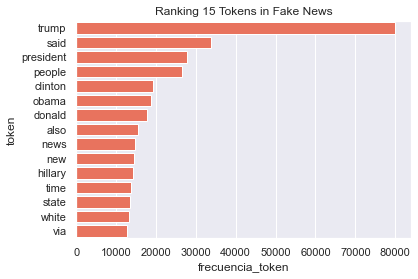

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.barplot(data=df_fake_sort_not_StopWords.head(15), x='frecuencia_token', y='token', color='tomato').set(title='Ranking 15 Tokens in Fake News') 

fig.savefig('p1.png', format='png', dpi=1200)

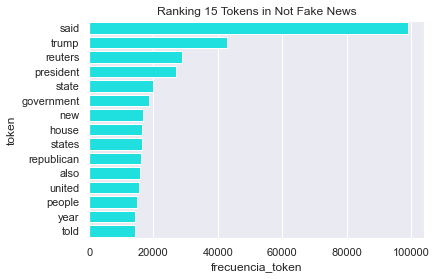

In [67]:
fig, ax = plt.subplots()

sns.barplot(data=df_no_fake_sort_not_StopWords.head(15), x='frecuencia_token', y='token', color='cyan').set(title='Ranking 15 Tokens in Not Fake News') 

fig.savefig('p2.png', format='png', dpi=1200)

A continuación, se estudia qué palabras se utilizan de forma más diferenciada en cada tipo de noticia (fake / no fake), es decir, palabras que utiliza mucho en fake newa y que no se utilizan en las no fakes, y viceversa. 

Una forma de hacer este análisis es mediante el odds ratio de las frecuencias.

$$\dfrac{ \frac{n_{k0} + 1}{N_0 + 1} }{  \frac{n_{k1} + 1}{N_1 +1}  }$$
 
Donde:

$n_{k0}$  el número de veces que aparece el término (token) k en las fake news  

$n_{k1}$ el numero de veces  que aparece el termino (token) k en las no fake news.

$N_0$ es el número de terminos (tokens, contando repeticiones) que aparecen en las fake news 

$N_1$ es el número de terminos (tokens, contando repeticiones) que aparecen en las no fake news 

In [68]:
def n_k1(token) : 

    n_k1 = df_fake_sort_not_StopWords.loc[ df_fake_sort_not_StopWords['token']==token , 'frecuencia_token']

    return(n_k1)

In [69]:
def n_k0(token) : 

    n_k0 = df_no_fake_sort_not_StopWords.loc[ df_no_fake_sort_not_StopWords['token']==token , 'frecuencia_token']

    return(n_k0)

In [70]:
n_k0('trump') 

17    42755
Name: frecuencia_token, dtype: int64

In [71]:
n_k1('trump') 

10    79922
Name: frecuencia_token, dtype: int64

N_0 y N_1 coinciden con el nº de tokens (contando repeticiones , y sin stops words) que aparecen el las no fake  y  fake news, respectivamente:

In [72]:
Fake_News_Tokens_not_StopWords = Fake_News_Tokens[ ~ Fake_News_Tokens['token'].isin(stop_words) ]

In [73]:
Fake_News_Tokens_not_StopWords

,id_text,token,Fake
0,0,donald,1
0,0,trump,1
0,0,wish,1
0,0,americans,1
0,0,happy,1
...,...,...,...
44897,44897,energy,0
44897,44897,technology,0
44897,44897,aviation,0
44897,44897,among,0


In [74]:
Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()

Fake
0    4782198
1    5396339
Name: token, dtype: int64

In [75]:
N0 = Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()[0]

N1 = Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()[1]

In [76]:
N0

4782198

In [77]:
N1

5396339

In [78]:
Fake_News_Tokens_not_StopWords.groupby(by='Fake')['token'].count()

Fake
0    4782198
1    5396339
Name: token, dtype: int64

In [79]:
n_k0('trump') / N0 

17    0.00894
Name: frecuencia_token, dtype: float64

In [80]:
n_k1('trump') / N1

10    0.01481
Name: frecuencia_token, dtype: float64

In [81]:
float( n_k1('trump') / N1 ) / float( n_k0('trump') / N0 )

1.6565622548396417

In [82]:
df1 = df_fake_sort_not_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df1

,index,Fake,token,frecuencia_token
0,125805,1,aa,24
1,125806,1,aaa,9
2,125807,1,aaaaaaaand,1
3,125808,1,aaaaackkk,1
4,125809,1,aaaaapkfhk,1
...,...,...,...,...
125561,251605,1,””it,0
125562,251606,1,””when,0
125563,251607,1,•if,0
125564,251608,1,☑️,0


In [83]:
df0 = df_no_fake_sort_not_StopWords.sort_values(by=["token"]).reset_index(drop=True)
df0

,index,Fake,token,frecuencia_token
0,0,0,aa,22
1,1,0,aaa,7
2,2,0,aaaaaaaand,0
3,3,0,aaaaackkk,0
4,4,0,aaaaapkfhk,0
...,...,...,...,...
125561,125800,0,””it,1
125562,125801,0,””when,1
125563,125802,0,•if,3
125564,125803,0,☑️,3


In [84]:
n_k0_vector = df0['frecuencia_token']

In [85]:
( n_k0_vector + 1 ) / ( N0 + 1)

0         4.809503e-06
1         1.672871e-06
2         2.091088e-07
3         2.091088e-07
4         2.091088e-07
              ...     
125561    4.182176e-07
125562    4.182176e-07
125563    8.364353e-07
125564    8.364353e-07
125565    4.182176e-07
Name: frecuencia_token, Length: 125566, dtype: float64

In [86]:
n_k1_vector = df1['frecuencia_token']

In [87]:
( n_k1_vector + 1 ) / ( N1 + 1)

0         4.632770e-06
1         1.853108e-06
2         3.706216e-07
3         3.706216e-07
4         3.706216e-07
              ...     
125561    1.853108e-07
125562    1.853108e-07
125563    1.853108e-07
125564    1.853108e-07
125565    1.853108e-07
Name: frecuencia_token, Length: 125566, dtype: float64

In [88]:
Odds_ratio = ( ( n_k1_vector + 1 ) / ( N1 + 1) ) / ( ( n_k0_vector + 1 ) / ( N0 + 1) )

In [89]:
Odds_ratio

0         0.963253
1         1.107741
2         1.772386
3         1.772386
4         1.772386
            ...   
125561    0.443097
125562    0.443097
125563    0.221548
125564    0.221548
125565    0.443097
Name: frecuencia_token, Length: 125566, dtype: float64

In [90]:
df0['Odds_ratio_Fake_NotFake'] = Odds_ratio  
df1['Odds_ratio_Fake_NotFake'] = Odds_ratio  

df0['Odds_ratio_NotFake_Fake'] = 1 / df0["Odds_ratio_Fake_NotFake"] 
df1['Odds_ratio_NotFake_Fake'] = 1 / df1["Odds_ratio_Fake_NotFake"] 

In [91]:
df0

,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,0,0,aa,22,0.963253,1.038149
1,1,0,aaa,7,1.107741,0.902738
2,2,0,aaaaaaaand,0,1.772386,0.564211
3,3,0,aaaaackkk,0,1.772386,0.564211
4,4,0,aaaaapkfhk,0,1.772386,0.564211
...,...,...,...,...,...,...
125561,125800,0,””it,1,0.443097,2.256845
125562,125801,0,””when,1,0.443097,2.256845
125563,125802,0,•if,3,0.221548,4.513689
125564,125803,0,☑️,3,0.221548,4.513689


In [92]:
df1

,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,125805,1,aa,24,0.963253,1.038149
1,125806,1,aaa,9,1.107741,0.902738
2,125807,1,aaaaaaaand,1,1.772386,0.564211
3,125808,1,aaaaackkk,1,1.772386,0.564211
4,125809,1,aaaaapkfhk,1,1.772386,0.564211
...,...,...,...,...,...,...
125561,251605,1,””it,0,0.443097,2.256845
125562,251606,1,””when,0,0.443097,2.256845
125563,251607,1,•if,0,0.221548,4.513689
125564,251608,1,☑️,0,0.221548,4.513689


In [93]:
df0.sort_values(by=["Odds_ratio_Fake_NotFake"], ascending=False).reset_index(drop=True).head(5)

,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,35830,0,finicum,0,320.801884,0.003117
1,114264,0,wikimedia,0,200.279629,0.004993
2,109040,0,uninterruptible,0,189.645313,0.005273
3,78372,0,philosophers,0,186.100540,0.005373
4,60711,0,lovable,0,183.441961,0.005451


In [94]:
df0.sort_values(by=["Odds_ratio_NotFake_Fake"], ascending=False).reset_index(drop=True).head(5)


,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,106864,0,trump’s,11629,0.000076,13123.551362
1,72989,0,obama’s,2132,0.000415,2406.924768
2,18791,0,clinton’s,1604,0.000552,1811.117793
3,76630,0,party’s,1101,0.000804,1243.521376
4,98675,0,state’s,1010,0.000877,1140.834946


In [95]:
df1.sort_values(by=["Odds_ratio_Fake_NotFake"], ascending=False).reset_index(drop=True).head(5)

,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,161635,1,finicum,361,320.801884,0.003117
1,240069,1,wikimedia,225,200.279629,0.004993
2,234845,1,uninterruptible,213,189.645313,0.005273
3,204177,1,philosophers,209,186.100540,0.005373
4,186516,1,lovable,206,183.441961,0.005451


In [96]:
df1.sort_values(by=["Odds_ratio_NotFake_Fake"], ascending=False).reset_index(drop=True).head(5)

,index,Fake,token,frecuencia_token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,232669,1,trump’s,0,0.000076,13123.551362
1,198794,1,obama’s,0,0.000415,2406.924768
2,144596,1,clinton’s,0,0.000552,1811.117793
3,202435,1,party’s,0,0.000804,1243.521376
4,224480,1,state’s,0,0.000877,1140.834946


Notese que en ambos data sets las columnas Odds_ratio_Fake_NotFake  y Odds_ratio_NotFake_Fake son las mismas, por tanto podemos construir un nuevo data set solo con esas columnas y otra para los tokens, a partir de cualquiera de esos dos data-sets.

In [97]:
Odds_ratio_df = df1.loc[: , ['token', 'Odds_ratio_Fake_NotFake' , 'Odds_ratio_NotFake_Fake']] 
Odds_ratio_df 

,token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
0,aa,0.963253,1.038149
1,aaa,1.107741,0.902738
2,aaaaaaaand,1.772386,0.564211
3,aaaaackkk,1.772386,0.564211
4,aaaaapkfhk,1.772386,0.564211
...,...,...,...
125561,””it,0.443097,2.256845
125562,””when,0.443097,2.256845
125563,•if,0.221548,4.513689
125564,☑️,0.221548,4.513689


In [98]:
Odds_ratio_df.sort_values(by=["Odds_ratio_Fake_NotFake"], ascending=False).head(15)

,token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
35775,finicum,320.801884,0.003117
114071,wikimedia,200.279629,0.004993
108870,uninterruptible,189.645313,0.005273
78242,philosophers,186.100540,0.005373
60612,lovable,183.441961,0.005451
91113,savants,182.555768,0.005478
67583,moralists,182.555768,0.005478
97785,spore,182.555768,0.005478
84324,rascals,181.669575,0.005504
32976,evangelists,181.669575,0.005504


In [99]:
Odds_ratio_df.sort_values(by=["Odds_ratio_NotFake_Fake"], ascending=False).head(15)

,token,Odds_ratio_Fake_NotFake,Odds_ratio_NotFake_Fake
106696,trump’s,0.000076,13123.551362
72874,obama’s,0.000415,2406.924768
18756,clinton’s,0.000552,1811.117793
76500,party’s,0.000804,1243.521376
98529,state’s,0.000877,1140.834946
80975,president’s,0.000979,1021.222183
83999,rakhine,0.000987,1013.323226
1242,administration’s,0.001157,864.371483
88673,rohingya,0.001294,772.969276
117944,zuma,0.001298,770.712432


In [100]:
### Alternativa computacionalmente mas costosa:

# for token , i in zip( df_fake_sort_sin_StopWords['token'] , range(0, len(df_fake_sort_sin_StopWords)) ):

   # df_fake_sort_sin_StopWords['Odds_ratio_notFake_Fake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

# for token , i in zip( df_no_fake_sort_sin_StopWords['token'] , range(0, len(df_no_fake_sort_sin_StopWords)) ):

   # df_no_fake_sort_sin_StopWords['Odds_ratio_notFake_Fake'][i] = float( (n_k0(token) + 1) / (N0 + 1) ) / float( (n_k1(token) + 1) / (N1 + 1) )

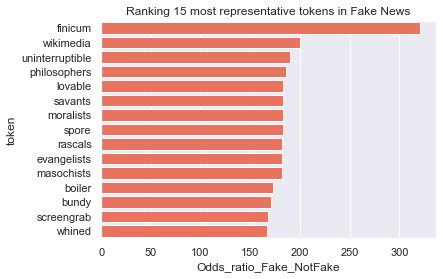

In [101]:
fig, ax = plt.subplots()

sns.barplot(data=Odds_ratio_df.sort_values(by=["Odds_ratio_Fake_NotFake"], ascending=False).head(15) ,
                 x='Odds_ratio_Fake_NotFake', y='token', color='tomato').set(title='Ranking 15 most representative tokens in Fake News') 

fig.savefig('p3.png', format='png', dpi=1200)

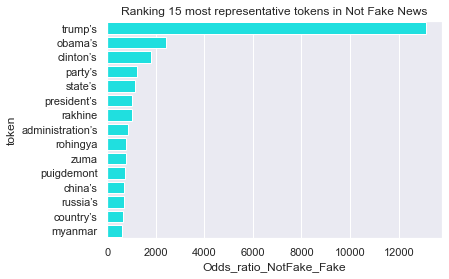

In [102]:
fig, ax = plt.subplots()

sns.barplot(data=Odds_ratio_df.sort_values(by=["Odds_ratio_NotFake_Fake"], ascending=False).head(15) ,
                 x='Odds_ratio_NotFake_Fake', y='token', color='cyan').set(title='Ranking 15 most representative tokens in Not Fake News') 

fig.savefig('p4.png', format='png', dpi=1200)

Uno de los principales intereses en text mining, natural language processing e information retrieval es cuantificar la temática de un texto, así como la importancia de cada término que lo forma. Una manera sencilla de medir la importancia de un término dentro de un documento es utilizando la frecuencia con la que aparece (tf, term-frequency). Esta aproximación, aunque simple, tiene la limitación de atribuir mucha importancia a aquellas palabras que aparecen muchas veces aunque no aporten información selectiva. Por ejemplo, si la palabra matemáticas aparece 5 veces en un documento y la palabra página aparece 50, la segunda tendrá 10 veces más peso a pesar de que no aporte tanta información sobre la temática del documento. Para solucionar este problema se pueden ponderar los valores tf multiplicándolos por la inversa de la frecuencia con la que el término en cuestión aparece en el resto de documentos(idf). De esta forma, se consigue reducir el valor de aquellos términos que aparecen en muchos documentos y que, por lo tanto, no aportan información selectiva.



El estadístico tf-idf mide cómo de informativo es un término en un documento teniendo en cuenta la frecuencia con la que ese término aparece en otros documentos.





Term Frequency (tf)

$$tf (k, d)= \dfrac{n_k}{longitud( d)}$$
 
donde  $n_k$  es el número de veces que aparece el término  $k$  en el documento  $d$ , y longitudd(d) es el nº de terminos del documento d



Inverse Document Frequency

$$idf (k)=log(\dfrac{n(d)}{n(d,k)})$$
 
donde  $n(d)$  es el número total de documentos y $n(d,k)$  el número de documentos que contienen el término  $k$ .




Estadístico tf-idf

$$tf\_idf(k, d)=tf (k, d)∗idf (k)$$
 





En la práctica, para evitar problemas con el logaritmo cuando aparecen valores de 0, se emplea una versión corregida del  idf (t) . Esta es la versión implementada en Scikit Learn.

$$idf (k)=log(\dfrac{1+n(d)}{1+n(d,k)})+1$$
 


Tf means term-frequency while tf-idf means term-frequency times inverse
    document-frequency. This is a common term weighting scheme in information
    retrieval, that has also found good use in document classification.
    The goal of using tf-idf instead of the raw frequencies of occurrence of a
    token in a given document is to scale down the impact of tokens that occur
    very frequently in a given corpus and that are hence empirically less
    informative than features that occur in a small fraction of the training
    corpus.
    The formula that is used to compute the tf-idf for a term t of a document d
    in a document set is tf-idf(t, d) = tf(t, d) * idf(t), and the idf is
    computed as idf(t) = log [ n / df(t) ] + 1 (if ``smooth_idf=False``), where
    n is the total number of documents in the document set and df(t) is the
    document frequency of t; the document frequency is the number of documents
    in the document set that contain the term t. The effect of adding "1" to
    the idf in the equation above is that terms with zero idf, i.e., terms
    that occur in all documents in a training set, will not be entirely
    ignored.
    (Note that the idf formula above differs from the standard textbook
    notation that defines the idf as
    idf(t) = log [ n / (df(t) + 1) ]).
    If ``smooth_idf=True`` (the default), the constant "1" is added to the
    numerator and denominator of the idf as if an extra document was seen
    containing every term in the collection exactly once, which prevents
    zero divisions: idf(t) = log [ (1 + n) / (1 + df(t)) ] + 1.

Calculo de tf

In [103]:
# nº de veces que aparece cada termino (token) en cada noticia (n_k)

df_tf = pd.DataFrame( Fake_News_Tokens_not_StopWords.groupby(['id_text','token'])['token'].count().reset_index(name='n_k') )

# nº de terminos (tokens) en cada noticia (longitud(d))

df_tf['longitud(d)'] = df_tf.groupby('id_text')['n_k'].transform(sum)

# Calculo de term-frequency (tf)

df_tf['tf'] = df_tf['n_k'] / df_tf['longitud(d)']


In [104]:
df_tf.groupby('id_text')['tf'].max()

id_text
0        0.059761
1        0.034286
2        0.042553
3        0.044177
4        0.024631
           ...   
44893    0.036145
44894    0.068493
44895    0.029070
44896    0.034483
44897    0.030303
Name: tf, Length: 44182, dtype: float64

In [105]:
df_tf['max_tf'] = df_tf.groupby('id_text')['tf'].transform(max)

In [106]:
df_tf['tf_norm'] = df_tf['tf'] / df_tf['max_tf']

In [107]:
df_tf

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm
0,0,accept,1,251,0.003984,0.059761,0.066667
1,0,alan,1,251,0.003984,0.059761,0.066667
2,0,alansandoval,1,251,0.003984,0.059761,0.066667
3,0,allow,1,251,0.003984,0.059761,0.066667
4,0,also,1,251,0.003984,0.059761,0.066667
...,...,...,...,...,...,...,...
7155407,44897,union,1,132,0.007576,0.030303,0.250000
7155408,44897,volume,1,132,0.007576,0.030303,0.250000
7155409,44897,wants,1,132,0.007576,0.030303,0.250000
7155410,44897,worth,2,132,0.015152,0.030303,0.500000


Calculo de Idf

In [108]:
# Calculo del nº de documentos en los que aparece cada termino (token) (n(d,k))

df_Idf = pd.DataFrame( Fake_News_Tokens_not_StopWords.groupby(['token'])['id_text'].nunique().reset_index(name='n_d_k') )

# Ojo, si se usa count en lugar de nunique no se estaria contando el nº de documentos
# en los que aparece cada termino, si no el nº de veces en total (contando repeticiones) que
# aparece un termino en el conjunto de documentos. Por ejemplo, dado un termino k que aparece
# 10 veces en el documento d1 y 3 veces en el d4 , usando count() la cuenta sale 13 , que es el 
# nº de veces que aparece k en el conjunto de los documentos, en cambio usando nunique()
#  la cuenta sale 2 que es el nº de documentos en los que aparece el termino k, que es lo que buscamos

# Calculo del nº total de documentos (n_d)

df_Idf['n_d'] = len(Fake_News_Data)

# Calculo de Idf

df_Idf['Idf'] = np.log( (df_Idf['n_d'] ) / (df_Idf['n_d_k']) ) + 1 

In [109]:
df_Idf 

,token,n_d_k,n_d,Idf
0,aa,28,44898,8.379944
1,aaa,11,44898,9.314253
2,aaaaaaaand,1,44898,11.712149
3,aaaaackkk,1,44898,11.712149
4,aaaaapkfhk,1,44898,11.712149
...,...,...,...,...
125561,””it,1,44898,11.712149
125562,””when,1,44898,11.712149
125563,•if,1,44898,11.712149
125564,☑️,1,44898,11.712149


Calculo de tf-Idf

In [110]:
df_tf_Idf = pd.merge(df_tf, df_Idf, on='token')

df_tf_Idf['tf_Idf'] = df_tf_Idf['tf'] * df_tf_Idf['Idf'] 

df_tf_Idf['tf_Idf_norm'] = df_tf_Idf['tf_norm'] * df_tf_Idf['Idf']

df_tf_Idf = df_tf_Idf.sort_values(by="id_text")

In [111]:
df_tf_Idf

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm
0,0,accept,1,251,0.003984,0.059761,0.066667,1395,44898,4.471499,0.017815,0.298100
304262,0,pollitt,1,251,0.003984,0.059761,0.066667,1,44898,11.712149,0.046662,0.780810
304263,0,power,1,251,0.003984,0.059761,0.066667,5057,44898,3.183620,0.012684,0.212241
309320,0,president,3,251,0.011952,0.059761,0.200000,23571,44898,1.644376,0.019654,0.328875
332891,0,presidential,1,251,0.003984,0.059761,0.066667,8823,44898,2.627031,0.010466,0.175135
...,...,...,...,...,...,...,...,...,...,...,...,...
5516302,44897,amid,1,132,0.007576,0.030303,0.250000,1316,44898,4.529796,0.034317,1.132449
5350014,44897,string,1,132,0.007576,0.030303,0.250000,404,44898,5.710734,0.043263,1.427683
2043348,44897,state,2,132,0.015152,0.030303,0.500000,14226,44898,2.149322,0.032565,1.074661
1423490,44897,delivered,1,132,0.007576,0.030303,0.250000,882,44898,4.929956,0.037348,1.232489


In [112]:
def euclidean_norm( v ):

  return np.sqrt( (v**2).sum() )

In [113]:
euclidean_norm( np.array([3, 2]))

3.605551275463989

In [114]:
np.sqrt(3**2 + 2**2)

3.605551275463989

In [115]:
df_tf_Idf['euclidean_norm'] = df_tf_Idf.groupby('id_text')['tf_Idf'].transform( euclidean_norm)

In [116]:
df_tf_Idf['tf_Idf_sklearn'] = df_tf_Idf['tf_Idf'] / df_tf_Idf['euclidean_norm']

In [117]:
df_tf_Idf

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
0,0,accept,1,251,0.003984,0.059761,0.066667,1395,44898,4.471499,0.017815,0.298100,0.510600,0.034890
304262,0,pollitt,1,251,0.003984,0.059761,0.066667,1,44898,11.712149,0.046662,0.780810,0.510600,0.091386
304263,0,power,1,251,0.003984,0.059761,0.066667,5057,44898,3.183620,0.012684,0.212241,0.510600,0.024841
309320,0,president,3,251,0.011952,0.059761,0.200000,23571,44898,1.644376,0.019654,0.328875,0.510600,0.038492
332891,0,presidential,1,251,0.003984,0.059761,0.066667,8823,44898,2.627031,0.010466,0.175135,0.510600,0.020498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5516302,44897,amid,1,132,0.007576,0.030303,0.250000,1316,44898,4.529796,0.034317,1.132449,0.585168,0.058644
5350014,44897,string,1,132,0.007576,0.030303,0.250000,404,44898,5.710734,0.043263,1.427683,0.585168,0.073933
2043348,44897,state,2,132,0.015152,0.030303,0.500000,14226,44898,2.149322,0.032565,1.074661,0.585168,0.055651
1423490,44897,delivered,1,132,0.007576,0.030303,0.250000,882,44898,4.929956,0.037348,1.232489,0.585168,0.063825


Puede observarse que para la primera noticia (id_text = 0), todos los términos que aparecen una vez, tienen el mismo valor de tf, sin embargo, dado que no todos los términos aparecen con la misma frecuencia en el conjunto de todas las noticias, la corrección de idf es distinta para cada uno.

Clasificacion de texto:

Para poder aplicar algoritmos de clasificación a un texto, es necesario crear una representación numérica del mismo. Una de las formas más utilizadas se conoce como Bag of Words. Este método consiste en identificar el set formado por todas las palabras (tokens) que aparecen en el corpus, en este caso el conjunto de todos los tweets recuperados. Con este set se crea un espacio n-dimensional en el que cada dimensión (columna) es una palabra. Por último, se proyecta cada texto en ese espacio, asignando un valor para cada dimensión. En la mayoría de casos, el valor utilizado es el tf-idf.

Para facilitar la obtención de la matriz TF-IDF se recurre a la clase TfidVectorized también de Scikit-Learn pero, en lugar de utilizar el tokenizador por defecto, se emplea el mismo definido en los apartados anteriores. Se podria construir  la matriz TF-IDF sin apoyarnos en librerias de Python, a traves de bucles, por ejemplo, pero dado las dimensiones que estamos manejando, es computacionalmente imposible a traves de esa via, por ello hay que apoyarse en vias mas eficientes como las implementadas en sklearn.

TF_IDF Matrix con sklearn

In [118]:
X_data = Fake_News_Data.loc[ : , 'text']
X_data

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
44893    BRUSSELS (Reuters) - NATO allies on Tuesday we...
44894    LONDON (Reuters) - LexisNexis, a provider of l...
44895    MINSK (Reuters) - In the shadow of disused Sov...
44896    MOSCOW (Reuters) - Vatican Secretary of State ...
44897    JAKARTA (Reuters) - Indonesia will buy 11 Sukh...
Name: text, Length: 44898, dtype: object

In [119]:
Y_data = Fake_News_Data.loc[ : , 'Fake']
Y_data

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: Fake, Length: 44898, dtype: object

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
tfidf_vectorizador = TfidfVectorizer(tokenizer  = limpiar_tokenizar, min_df = 0, stop_words = stop_words, smooth_idf=False)

In [122]:
tfidf_vectorizador.fit(X_data)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=0, smooth_idf=False,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function limpiar_tokenizar at 0x00000193D33A6CB0>)

In [123]:
tfidf_matrix = tfidf_vectorizador.transform(X_data)

In [124]:
tfidf_matrix.shape

(44898, 125566)

In [125]:
print(tfidf_vectorizador.get_feature_names_out()[0:50])

['aa' 'aaa' 'aaaaaaaand' 'aaaaackkk' 'aaaaapkfhk' 'aaaahhhh' 'aaaand'
 'aaaarrgh' 'aaab' 'aaarf' 'aab' 'aaba' 'aabfsv' 'aabge' 'aabo'
 'aaccording' 'aachen' 'aacnr' 'aadhaar' 'aadhar' 'aadl' 'aaf' 'aafn'
 'aag' 'aahd' 'aahwuhvvnh' 'aai' 'aaj' 'aaja' 'aal' 'aalberg' 'aalberts'
 'aaldef' 'aaliyah' 'aamer' 'aamin' 'aammir' 'aamom' 'aamrrd' 'aan'
 'aaofj' 'aapa' 'aapi' 'aapl' 'aapxim' 'aar' 'aardal' 'aardvark'
 'aardvarks' 'aargh']


In [126]:
tfidf_vectorizador.get_feature_names_out()[10]

'aab'

In [127]:
df_index_token = pd.DataFrame( {'index' : range(0, len(tfidf_vectorizador.get_feature_names_out())) , 'token' : tfidf_vectorizador.get_feature_names_out() })

In [128]:
df_index_token

,index,token
0,0,aa
1,1,aaa
2,2,aaaaaaaand
3,3,aaaaackkk
4,4,aaaaapkfhk
...,...,...
125561,125561,””it
125562,125562,””when
125563,125563,•if
125564,125564,☑️


In [129]:
df_index_token.loc[df_index_token.token == 'accept', ]

,index,token
645,645,accept


In [130]:
tfidf_matrix[0, 645]

0.034889784479772486

In [131]:
df_tf_Idf.loc[ ( df_tf_Idf.id_text == 0 ) &  ( df_tf_Idf.token == 'accept' ) , ]

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
0,0,accept,1,251,0.003984,0.059761,0.066667,1395,44898,4.471499,0.017815,0.2981,0.5106,0.03489


In [141]:
df_index_token.loc[df_index_token.token == 'pollitt', ]

,index,token
79741,79741,pollitt


In [142]:
tfidf_matrix[0, 79741]

0.09138643507615184

In [143]:
df_tf_Idf.loc[ ( df_tf_Idf.id_text == 0 ) &  ( df_tf_Idf.token == 'pollitt' ) , ]

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
304262,0,pollitt,1,251,0.003984,0.059761,0.066667,1,44898,11.712149,0.046662,0.78081,0.5106,0.091386


In [144]:
df_index_token.loc[df_index_token.token == 'string', ]

,index,token
99546,99546,string


In [147]:
tfidf_matrix[44897, 99546]

0.07393279140214064

In [148]:
df_tf_Idf.loc[ ( df_tf_Idf.id_text == 44897 ) &  ( df_tf_Idf.token == 'string' ) , ]

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
5350014,44897,string,1,132,0.007576,0.030303,0.25,404,44898,5.710734,0.043263,1.427683,0.585168,0.073933


In [152]:
df_index_token.loc[df_index_token.token == 'never', ]

,index,token
70560,70560,never


In [153]:
tfidf_matrix[3, 70560]

0.022176846230040667

In [154]:
df_tf_Idf.loc[ ( df_tf_Idf.id_text == 3 ) &  ( df_tf_Idf.token == 'never' ) , ]

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
990208,3,never,1,249,0.004016,0.044177,0.090909,6077,44898,2.999882,0.012048,0.272717,0.543257,0.022177


In [136]:
df_index_token.loc[df_index_token.token == 'investigation', ]

,index,token
50314,50314,investigation


In [155]:
tfidf_matrix[1522, 50314]

0.2598673157066844

In [156]:
df_tf_Idf.loc[ ( df_tf_Idf.id_text == 1522 ) &  ( df_tf_Idf.token == 'investigation' ) , ]

,id_text,token,n_k,longitud(d),tf,max_tf,tf_norm,n_d_k,n_d,Idf,tf_Idf,tf_Idf_norm,euclidean_norm,tf_Idf_sklearn
635701,1522,investigation,7,210,0.033333,0.052381,0.636364,3753,44898,3.481838,0.116061,2.215715,0.446617,0.259867


In [140]:
tfidf_matrix = tfidf_vectorizador.fit_transform(X_data.iloc[0:2000,])

In [141]:
tfidf_df= pd.DataFrame(tfidf_matrix.todense())  
tfidf_df.columns = tfidf_vectorizador.get_feature_names()

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [142]:
tfidf_df

,aa,aaaand,aacnr,aaj,aaliyah,aaofj,aargh,aaron,aaroncovfefe,aaronshhh,...,zxf,zy,zyf,zyklon,zz,zzlo,zzomtmd,zztaine,zzzzaaaacccchhh,zzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039414,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
from sklearn.naive_bayes import GaussianNB

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_data,
    Y_data,
    test_size = 0.3,
    random_state = 123    
)

In [146]:
tfidf_vectorizador = TfidfVectorizer(tokenizer  = limpiar_tokenizar, min_df = 5, stop_words = stop_words, smooth_idf=False)

In [147]:
tfidf_vectorizador.fit(X_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=5, smooth_idf=False,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function limpiar_tokenizar at 0x00000245F12E6290>)

In [148]:
tfidf_matrix_train = tfidf_vectorizador.transform(X_train)

In [149]:
tfidf_matrix_train.shape

(31428, 34571)

In [150]:
gnb = GaussianNB()

In [151]:
Y_train = Y_train.astype('int')

In [152]:
gnb_fit = gnb.fit(tfidf_matrix_train.toarray(), Y_train)

In [153]:
tfidf_matrix_test = tfidf_vectorizador.transform(X_test)

In [154]:
tfidf_matrix_test.shape

(13470, 34571)

In [155]:
Y_pred = gnb_fit.predict(tfidf_matrix_test.toarray())

In [156]:
Y_test = Y_test.astype('int')

In [157]:
TEC_test = (Y_test != Y_pred).sum()/len(Y_test)

In [158]:
TEC_test

0.0593170007423905

In [159]:
len(Y_test)

13470

In [160]:
len(Y_pred)

13470

In [159]:
X_data[0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [169]:
df_no_fake_sort_not_StopWords.head(15)['token']

6           said
17         trump
26       reuters
28     president
36         state
41    government
44           new
47         house
48        states
49    republican
50          also
51        united
53        people
54          year
55          told
Name: token, dtype: object

In [173]:
xs = df_no_fake_sort_not_StopWords.head(15)['token']
s = ' '.join(str(x) for x in xs)

In [174]:
s

'said trump reuters president state government new house states republican also united people year told'

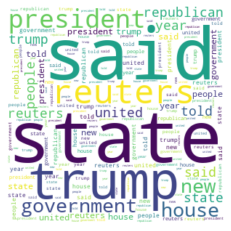

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = s

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 400* mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

web sklearn, numpy , pandas , wikipedia